In [3]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn # OOP
import torch.nn.functional as F # functional
import torch.optim as optim
import matplotlib.pyplot as plt
from random import randrange

train = datasets.MNIST("", train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST("", train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [7]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # fc1 - fully connected 1 layer
        # ofc imput needs to be flattened
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x): # how the data will flow through network
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [21]:
X = torch.rand((28,28))
X = X.view(-1,28*28) # -1 or 1, (-1 it's any size)
output = net(X)
output

tensor([[-2.2469, -2.2631, -2.3196, -2.3992, -2.3632, -2.2451, -2.2102, -2.2917,
         -2.3615, -2.3429]], grad_fn=<LogSoftmaxBackward0>)

In [28]:
# net.parameters() - everything that is adjustable in our model
# lr - learning rate - dictate the size of a step that optimizer would to to get to the best point
optimizer = optim.Adam(net.parameters(), lr=0.001)
EPOCHS = 3 # passes through entire dataset

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        #print(y); break # printing labels of batch
        net.zero_grad() 
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step() # adjust weights for us
    print(loss)

tensor(0.0406, grad_fn=<NllLossBackward0>)
tensor(0.0603, grad_fn=<NllLossBackward0>)
tensor(0.1872, grad_fn=<NllLossBackward0>)


In [30]:
correct = 0
total = 0

with torch.no_grad(): # we dont wanna calculate gradient here and optimize anything, just see how good nn is
    for data in testset:
        X,y = data
        output = net(X.view(-1,28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct+=1
            total += 1

print("Accuracy: ", correct/total)

Accuracy:  0.9686


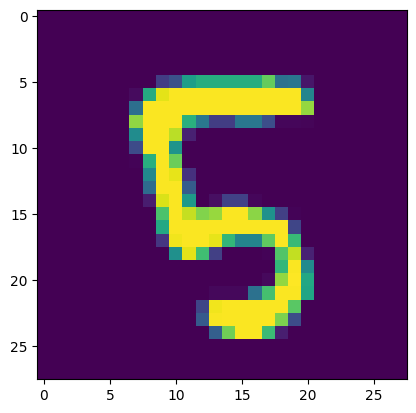

tensor(5)

In [50]:
i = randrange(10)
plt.imshow(X[i].view(28,28))
plt.show()
torch.argmax(net(X[i].view(-1,28*28))[0])